<a href="https://colab.research.google.com/github/Cado87/android-object-detection-tflite/blob/main/Conversion_YOLO11n_to_tflite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.0 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Load the YOLO11 model
model = YOLO("yolo11n.pt")

# Define export parameters
EXPORT_FORMAT = "int8"  # Options: "float32", "int8"
INPUT_SIZE = 640 if EXPORT_FORMAT == "float32" else 320

In [4]:
# Export the model to TFLite format based on the selected format and input size
if EXPORT_FORMAT == "float32":
    model.export(format="tflite", imgsz=INPUT_SIZE)  # creates 'yolo11n_float32.tflite'
elif EXPORT_FORMAT == "int8":
    model.export(format="tflite", imgsz=INPUT_SIZE, int8=True) # creates 'yolo11n_int8.tflite'

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 84, 2100) (5.4 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx>=1.12.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.67', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 7.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.19.0...
Unzipping calibration_image_sample_data_20x128x128x3_fl

In [5]:
# Load the exported TFLite model based on the selected format
if EXPORT_FORMAT == "float32":
    tflite_model = YOLO("yolo11n_saved_model/yolo11n_float32.tflite")
elif EXPORT_FORMAT == "int8":
    tflite_model = YOLO("yolo11n_saved_model/yolo11n_int8.tflite")

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [6]:
# Run inference
results = tflite_model("https://ultralytics.com/images/bus.jpg")

Loading yolo11n_saved_model/yolo11n_int8.tflite for TensorFlow Lite inference...

image 1/1 /content/bus.jpg: 320x320 4 persons, 1 bus, 36.7ms
Speed: 1.6ms preprocess, 36.7ms inference, 17.2ms postprocess per image at shape (1, 3, 320, 320)


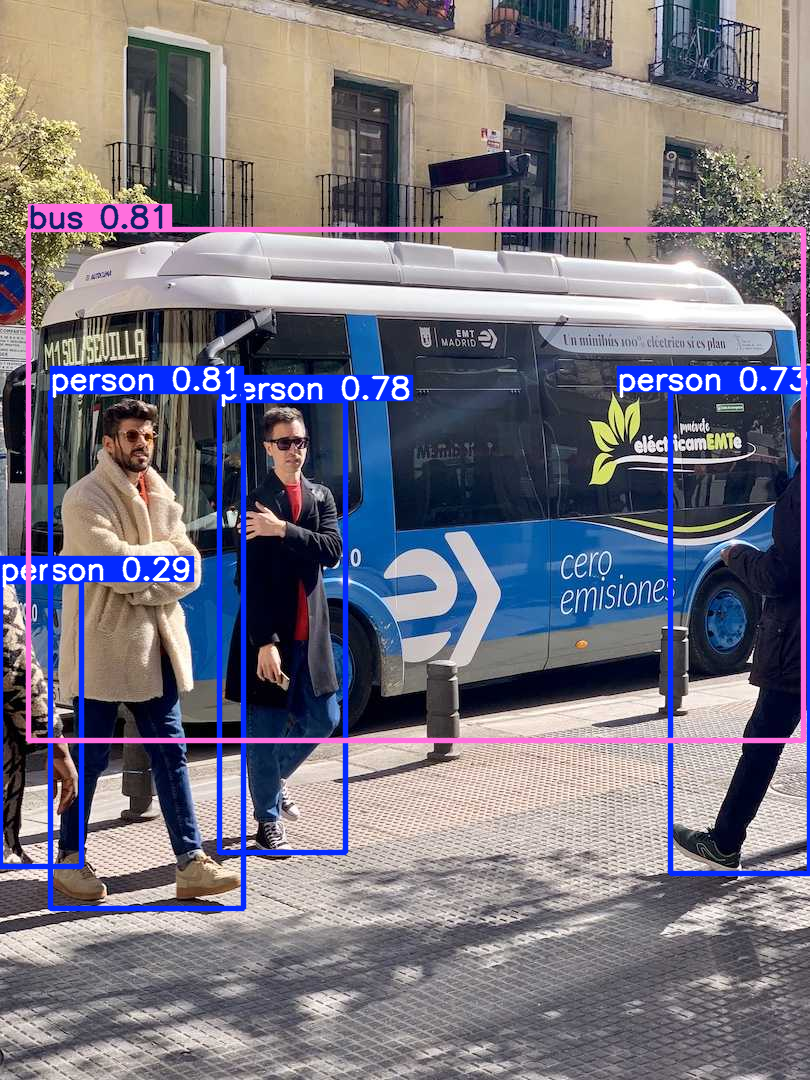

In [7]:
from IPython.display import display
from PIL import Image

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    display(im)